# Solutions

1. [Series Attributes and Statistical Methods](#1.-Series-Attributes-and-Statistical-Methods)
1. [Series Missing Value Methods](#2.-Series-Missing-Value-Methods)
1. [Series Sorting, Ranking, and Uniqueness](#3.-Series-Sorting,-Ranking,-and-Uniqueness)
1. [Series Methods More](#4.-Series-Methods-More)
1. [String Series Methods](#5.-String-Series-Methods)
1. [Datetime Series Methods](#6.-Datetime-Series-Methods)
1. [Project - Testing Normality of Stock Market Returns](#Project---Testing-Normality-of-Stock-Market-Returns)

## 1. Series Attributes and Statistical Methods

In [1]:
import pandas as pd
import numpy as np
movie = pd.read_csv('../data/movie.csv', index_col='title')
movie.head(3)

,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
Avatar,2009.0,Color,PG-13,178.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,...,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9
Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,...,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1
Spectre,2015.0,Color,PG-13,148.0,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,...,161.0,200074175.0,Action|Adventure|Thriller,602.0,275868,bomb|espionage|sequel|spy|terrorist,English,UK,245000000.0,6.8


In [2]:
score = movie['imdb_score']
score.head()

title
Avatar                                        7.9
Pirates of the Caribbean: At World's End      7.1
Spectre                                       6.8
The Dark Knight Rises                         8.5
Star Wars: Episode VII - The Force Awakens    7.1
Name: imdb_score, dtype: float64

### Exercise 1

<span  style="color:green; font-size:16px">What is the data type of `score` and how many values does it contain?</span>

In [3]:
score.dtype

dtype('float64')

In [4]:
score.size

4916

Or use the `len` method

In [5]:
len(score)

4916

### Exercise 2

<span  style="color:green; font-size:16px">What is the maximum and minimum score?</span>

In [6]:
score.max()

9.5

In [7]:
score.min()

1.6

### Exercise 3

<span  style="color:green; font-size:16px">How many movies have scores greater than 6?</span>

In [8]:
(score > 6).sum()

3368

### Exercise 4

<span  style="color:green; font-size:16px">How many movies have scores greater than 4 and less than 7?</span>

In [9]:
filt1 = score > 4
filt2 = score < 7
filt = filt1 & filt2
filt.sum()

3021

Or in one line of code

In [10]:
((score > 4) & (score < 7)).sum()

3021

Or use the `between` method.

In [11]:
score.between(4, 7, inclusive=False).sum()

3021

### Exercise 5

<span  style="color:green; font-size:16px">Find the difference between the median and mean of the scores.</span>

In [12]:
score.median() - score.mean()

0.16257119609438497

### Exercise 6

<span  style="color:green; font-size:16px">Add 1 to every value of `score` and then calculate the median.</span>

In [13]:
(score + 1).median()

7.6

### Exercise 7

<span  style="color:green; font-size:16px">Calculate the median of `score` and add 1 to this. Why is this value the same as Exercise 7?</span>

In [14]:
score.median() + 1

7.6

### Exercise 8

<span  style="color:green; font-size:16px">Return a Series that has only scores above the 99.9th percentile</span>

In [15]:
filt = score > score.quantile(.999)
score[filt]

title
The Shawshank Redemption    9.3
Towering Inferno            9.5
Dekalog                     9.1
The Godfather               9.2
Kickboxer: Vengeance        9.1
Name: imdb_score, dtype: float64

### Exercise 9

<span  style="color:green; font-size:16px">Assign the gross column of the movie dataset to its own variable name. Round it to the nearest million.</span>

In [16]:
gross = movie['gross']
gross.head()

title
Avatar                                        760505847.0
Pirates of the Caribbean: At World's End      309404152.0
Spectre                                       200074175.0
The Dark Knight Rises                         448130642.0
Star Wars: Episode VII - The Force Awakens            NaN
Name: gross, dtype: float64

In [17]:
gross.round(-6).head()

title
Avatar                                        761000000.0
Pirates of the Caribbean: At World's End      309000000.0
Spectre                                       200000000.0
The Dark Knight Rises                         448000000.0
Star Wars: Episode VII - The Force Awakens            NaN
Name: gross, dtype: float64

### Exercise 10

<span  style="color:green; font-size:16px">Calculate the cumulative sum of the gross Series and then select the 99th integer location.</span>

In [18]:
gross.cumsum().iloc[99]

23119723385.0

### Exercise 11

<span  style="color:green; font-size:16px">Select the first 100 values of the gross Series and then calculate the sum. Does the result match exercise 11.</span>

In [19]:
gross.iloc[:100].sum()

23119723385.0

## 2. Series Missing Value Methods

In [20]:
import pandas as pd
movie = pd.read_csv('../data/movie.csv', index_col='title')
duration = movie['duration']
actor1_fb = movie['actor1_fb']
actor2_fb = movie['actor2_fb']
actor1_fb.head()

title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor1_fb, dtype: float64

In [21]:
actor2_fb.head()

title
Avatar                                          936.0
Pirates of the Caribbean: At World's End       5000.0
Spectre                                         393.0
The Dark Knight Rises                         23000.0
Star Wars: Episode VII - The Force Awakens       12.0
Name: actor2_fb, dtype: float64

### Exercise 1

<span  style="color:green; font-size:16px">What percentage of actor 1 Facebook likes are missing?</span>

In [22]:
actor1_fb.isna().mean() * 100

0.14239218877135884

### Exercise 2

<span  style="color:green; font-size:16px">Use the `notna` method to find the number of non-missing values in the actor 1 Facebook like column. Verify this number is the same as the `count` method.</span>

In [23]:
actor2_fb.notna().sum()

4903

In [24]:
actor2_fb.count()

4903

### Exercise 3

<span  style="color:green; font-size:16px">Fill the missing values of `actor1_fb` with the maximum of `actor2_fb`. Save this result to variable `actor1_fb_full`</span>

In [25]:
max_fb2 = actor2_fb.max()
max_fb2

137000.0

In [26]:
actor1_fb_full = actor1_fb.fillna(max_fb2)
actor1_fb_full.head()

title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor1_fb, dtype: float64

### Exercise 4

<span  style="color:green; font-size:16px">Verify the results of Exercise 3 by selecting just the values of `actor1_fb_full` that were filled by `actor2_fb`.</span>

In [27]:
filt = actor1_fb.isna()
actor1_fb_full[filt]

title
Pink Ribbons, Inc.         137000.0
Sex with Strangers         137000.0
The Harvest/La Cosecha     137000.0
Ayurveda: Art of Being     137000.0
The Brain That Sings       137000.0
The Blood of My Brother    137000.0
Counting                   137000.0
Name: actor1_fb, dtype: float64

In [28]:
actor2_fb.max()

137000.0

### Exercise 5

<span  style="color:green; font-size:16px">Use the `duration` Series and test whether each movie is greater than 100. Assign the resulting Series to `filt`. Then test whether the `duration` Series is less than or equal to 100 and assign it to `filt2. Call the `sum` method on both of these new Series and add their results together. Why doesn't this result equal the total length of the Series? Shouldn't a value be either greater than 100 or less than or equal to 100?</span>

In [29]:
filt = duration > 100
filt2 = duration <= 100

In [30]:
filt.sum() + filt2.sum()

4901

Missing values always get evaluated as `False` for comparisons. You need to add in the missing values to get the total length of the Series.

In [31]:
filt.sum() + filt2.sum() + duration.isna().sum()

4916

In [32]:
len(duration)

4916

### Exercise 6

<span  style="color:green; font-size:16px">How many missing values are there in the `year` column.</span>

In [33]:
movie['year'].isna().sum()

106

### Exercise 7

<span  style="color:green; font-size:16px">Select the language column as a Series and assign it to a variable with the same name. Create a variable `filt` that determines whether a language is missing. Create a new Series that fills in all missing languages with 'English' and assign it to the variable `language2`. Output both `language` and `language2` for the movies that originally had missing values.</span>

In [34]:
language = movie['language']
filt = language.isna()
language2 = language.fillna('English')

In [35]:
language[filt]

title
Star Wars: Episode VII - The Force Awakens               NaN
10,000 B.C.                                              NaN
Unforgettable                                            NaN
September Dawn                                           NaN
Alpha and Omega 4: The Legend of the Saw Toothed Cave    NaN
Silent Movie                                             NaN
Love's Abiding Joy                                       NaN
Kickboxer: Vengeance                                     NaN
A Fine Step                                              NaN
Intolerance: Love's Struggle Throughout the Ages         NaN
The Big Parade                                           NaN
Over the Hill to the Poorhouse                           NaN
Name: language, dtype: object

In [36]:
language2[filt]

title
Star Wars: Episode VII - The Force Awakens               English
10,000 B.C.                                              English
Unforgettable                                            English
September Dawn                                           English
Alpha and Omega 4: The Legend of the Saw Toothed Cave    English
Silent Movie                                             English
Love's Abiding Joy                                       English
Kickboxer: Vengeance                                     English
A Fine Step                                              English
Intolerance: Love's Struggle Throughout the Ages         English
The Big Parade                                           English
Over the Hill to the Poorhouse                           English
Name: language, dtype: object

### Exercise 7

<span  style="color:green; font-size:16px">Repeat exercise 7 without first assigning the language column to a variable. Reference it by using *just the brackets*. Still make a variable `language2` to verify th</span>

In [37]:
filt = movie['language'].isna()
language2 = movie['language'].fillna('English')
language2[filt]

title
Star Wars: Episode VII - The Force Awakens               English
10,000 B.C.                                              English
Unforgettable                                            English
September Dawn                                           English
Alpha and Omega 4: The Legend of the Saw Toothed Cave    English
Silent Movie                                             English
Love's Abiding Joy                                       English
Kickboxer: Vengeance                                     English
A Fine Step                                              English
Intolerance: Love's Struggle Throughout the Ages         English
The Big Parade                                           English
Over the Hill to the Poorhouse                           English
Name: language, dtype: object

### Exercise 8

<span  style="color:green; font-size:16px">Select the `gross` column, and drop all missing values from it. Confirm that the new length of the resulting Series is correct.</span>

In [38]:
gd = movie['gross'].dropna()
len(gd)

4054

In [39]:
movie['gross'].isna().sum()

862

In [40]:
movie['gross'].isna().sum() + len(gd)

4916

### Exercise 9

<span  style="color:green; font-size:16px">Read in `girl_height.csv` as a DataFrame and output all of the data. The average height for each age is found in the `height` column. Assign the `height_na` Series to a variable. Notice that all ages from 2 through 12 are missing, but all other ages have the same value as the `height` column. Use the `interpolate` method to fill in the missing values with method 'linear', 'quadratic', and 'cubic'. Save each interpolated Series to a variable with the same name as its method.</span>

In [41]:
girl_height = pd.read_csv('../data/girl_height.csv')
girl_height

,age,height,height_na
0,0,19.00,19.00
1,1,29.00,29.00
2,2,34.00,NaN
3,3,37.00,NaN
4,4,39.50,NaN
5,5,42.00,NaN
6,6,45.50,NaN
7,7,48.00,NaN
8,8,50.00,NaN
9,9,52.50,NaN


In [42]:
hna = girl_height['height_na']

In [43]:
linear = hna.interpolate('linear')
quadratic = hna.interpolate('quadratic')
cubic = hna.interpolate('cubic')

### Exercise 10

<span  style="color:green; font-size:16px">Uncomment and run the commands below to plot each interpolated Series. Which one provides the best estimate for height?</span>

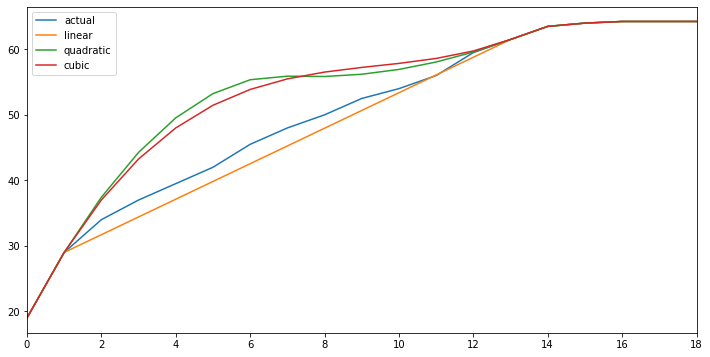

In [44]:
%matplotlib inline
girl_height['height'].plot(figsize=(12, 6), label='actual', legend=True)
linear.plot(label='linear', legend=True)
quadratic.plot(label='quadratic', legend=True)
cubic.plot(label='cubic', legend=True)

## 3. Series Sorting, Ranking, and Uniqueness

In [45]:
movie = pd.read_csv('../data/movie.csv', index_col='title')
movie.head(3)

,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
Avatar,2009.0,Color,PG-13,178.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,...,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9
Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,...,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1
Spectre,2015.0,Color,PG-13,148.0,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,...,161.0,200074175.0,Action|Adventure|Thriller,602.0,275868,bomb|espionage|sequel|spy|terrorist,English,UK,245000000.0,6.8


### Exercise 1

<span  style="color:green; font-size:16px">Select the column holding the number of reviews as a Series and sort if from greatest to least.</span>

In [46]:
movie['num_reviews'].sort_values(ascending=False).head()

title
The Dark Knight Rises    813.0
Prometheus               775.0
Django Unchained         765.0
Skyfall                  750.0
Mad Max: Fury Road       739.0
Name: num_reviews, dtype: float64

### Exercise 2

<span  style="color:green; font-size:16px">Find the number of unique actors in each of the actor columns. Do not count missing valus. Use three separate calls to `nunique`.</span>

In [47]:
movie['actor1'].nunique()

2095

In [48]:
movie['actor2'].nunique()

3030

In [49]:
movie['actor3'].nunique()

3519

### Exercise 3
<span  style="color:green; font-size:16px">Select the `year` column, sort it, and drop any duplicates?</span>

In [50]:
movie['year'].sort_values().drop_duplicates().head()

title
Intolerance: Love's Struggle Throughout the Ages    1916.0
Over the Hill to the Poorhouse                      1920.0
The Big Parade                                      1925.0
Metropolis                                          1927.0
The Broadway Melody                                 1929.0
Name: year, dtype: float64

### Exercise 4
<span  style="color:green; font-size:16px">Get the same result as Exercise 3 by dropping duplicates first and then sort. Which method is faster?</span>

In [51]:
movie['year'].drop_duplicates().sort_values().head()

title
Intolerance: Love's Struggle Throughout the Ages    1916.0
Over the Hill to the Poorhouse                      1920.0
The Big Parade                                      1925.0
Metropolis                                          1927.0
Pandora's Box                                       1929.0
Name: year, dtype: float64

It's faster to drop duplicates first and then sort.

In [52]:
%timeit -n 5 movie['year'].sort_values().drop_duplicates().head()

1.86 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [53]:
%timeit -n 5 movie['year'].drop_duplicates().sort_values().head()

1.22 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


### Exercise 5

<span  style="color:green; font-size:16px">Rank each movie by duration from greatest to least and then sort this ranking from least to greatest. Output the top 10 values. Do you get the same result by sorting the duration from greatest to least?</span>

In [54]:
# yes, they are the same
movie['duration'].rank(ascending=False).sort_values().head(10)

title
Trapped                      1.0
Carlos                       2.0
Blood In, Blood Out          3.0
Heaven's Gate                4.0
The Legend of Suriyothai     5.0
Das Boot                     6.0
Apocalypse Now               7.0
The Company                  8.0
Gods and Generals            9.0
Gettysburg                  10.0
Name: duration, dtype: float64

In [55]:
movie['duration'].sort_values(ascending=False).head(10)

title
Trapped                     511.0
Carlos                      334.0
Blood In, Blood Out         330.0
Heaven's Gate               325.0
The Legend of Suriyothai    300.0
Das Boot                    293.0
Apocalypse Now              289.0
The Company                 286.0
Gods and Generals           280.0
Gettysburg                  271.0
Name: duration, dtype: float64

### Exercise 6

<span  style="color:green; font-size:16px">Select actor1 as a Series and sort it from least to greatest, but have missing values show up first. Output the first 10 values.</span>

In [56]:
movie['actor1'].sort_values(na_position='first').head(10)

title
Pink Ribbons, Inc.                  NaN
Sex with Strangers                  NaN
The Harvest/La Cosecha              NaN
Ayurveda: Art of Being              NaN
The Brain That Sings                NaN
The Blood of My Brother             NaN
Counting                            NaN
Get Rich or Die Tryin'          50 Cent
The Good Dinosaur          A.J. Buckley
Queen of the Damned             Aaliyah
Name: actor1, dtype: object

## 4. Series Methods More

In [57]:
emp = pd.read_csv('../data/employee.csv')
emp.head()

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


### Exercise 1

<span  style="color:green; font-size:16px">Find the minimum, maximum, mean, median, and standard deviation of the salary column. Return the result as a Series.</span>

In [58]:
emp['salary'].agg(['min', 'max', 'mean', 'median', 'std'])

min         9912.000000
max       342784.000000
mean       58206.761571
median     56956.640000
std        23322.315285
Name: salary, dtype: float64

### Exercise 2

<span  style="color:green; font-size:16px">Use the `idxmax` and `idxmin` methods to find the index of where the maximum and minimum salaries are located in the DataFrame. Then use the `loc` indexer to select both of those rows as a DataFrame.</span>

In [59]:
imax = emp['salary'].idxmax()
imin = emp['salary'].idxmin()
rows = [imax, imin]
rows

[1732, 1183]

In [60]:
emp.loc[rows, :]

,dept,title,hire_date,salary,sex,race
1732,Fire,"PHYSICIAN,MD",2014-09-27,342784.0,Male,White
1183,Library,CUSTOMER SERVICE CLERK,2016-01-19,9912.0,Female,Hispanic


### Exercise 3

<span  style="color:green; font-size:16px">Repeat exercise 3, but do so on the `imdb_score` column from the movie dataset.</span>

In [61]:
score = movie['imdb_score']
rows = [score.idxmax(), score.idxmin()]
rows

['Towering Inferno', 'Justin Bieber: Never Say Never']

In [62]:
movie.loc[rows, :]

,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,...,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
Towering Inferno,NaN,Color,NaN,65.0,John Blanchard,0.0,Martin Short,770.0,Andrea Martin,179.0,...,176.0,NaN,Comedy,NaN,10,NaN,English,Canada,NaN,9.5
Justin Bieber: Never Say Never,2011.0,Color,G,115.0,Jon M. Chu,209.0,Usher Raymond,569.0,Sean Kingston,69.0,...,41.0,73000942.0,Documentary|Music,84.0,74351,boyhood friend|manager|plasma tv|prodigy|star,English,USA,13000000.0,1.6


### Exercise 4

<span  style="color:green; font-size:16px">The `idxmax` and `idxmin` methods are aggregations as they return a single value. Use the `agg` method to return the min/max `imdb_score` and the label for each score.</span>

In [63]:
score = movie['imdb_score']
score.agg(['min', 'idxmin', 'max', 'idxmax'])

min                                  1.6
idxmin    Justin Bieber: Never Say Never
max                                  9.5
idxmax                  Towering Inferno
Name: imdb_score, dtype: object

### Exercise 5

<span  style="color:green; font-size:16px">Read in 20 years of Microsoft stock data, setting the 'timestamp' column as the index. Find the top 5 largest one-day percentage gains in the `adjusted_close`.</span>

In [64]:
msft = pd.read_csv('../data/stocks/msft20.csv')
msft.head(3)

,date,open,high,low,close,adjusted_close,volume,dividend_amount
0,1999-10-19,88.250,89.250,85.25,86.313,27.8594,69945600,0.0
1,1999-10-20,91.563,92.375,90.25,92.250,29.7758,88090600,0.0
2,1999-10-21,90.563,93.125,90.50,93.063,30.0381,60801200,0.0


In [65]:
ac = msft['adjusted_close']
ac.pct_change().nlargest()

254     0.195654
2259    0.186043
2288    0.122646
639     0.111181
305     0.105183
Name: adjusted_close, dtype: float64

### Exercise 6

<span  style="color:green; font-size:16px">Randomly sample the `actor1` column as a Series with replacement to select three values. Use random state 12345. Setting a random state ensures that the same random sample is chosen regardless of which machine or version of numpy is being used.</span>

In [66]:
movie['actor1'].sample(n=3, random_state=12345)

title
Windtalkers                     Nicolas Cage
Mission: Impossible               Tom Cruise
Saw 3D: The Final Chapter    Costas Mandylor
Name: actor1, dtype: object

### Exercise 7

<span  style="color:green; font-size:16px">Select the title column from the employee dataset as a Series. Replace the all occurrences of 'POLICE OFFICER' and 'SENIOR POLICE OFFICER' with 'POLICE'. You can use a list as the first argument passed to the `replace` method.</span>

In [67]:
emp['title'].head()

0               POLICE SERGEANT
1    ASSISTANT CITY ATTORNEY II
2       SENIOR SLUDGE PROCESSOR
3         SENIOR POLICE OFFICER
4         SENIOR POLICE OFFICER
Name: title, dtype: object

In [68]:
vals = ['POLICE OFFICER', 'SENIOR POLICE OFFICER']
emp['title'].replace(vals, 'POLICE').head()

0               POLICE SERGEANT
1    ASSISTANT CITY ATTORNEY II
2       SENIOR SLUDGE PROCESSOR
3                        POLICE
4                        POLICE
Name: title, dtype: object

## 5. String Series Methods

In [69]:
import pandas as pd
movie = pd.read_csv('../data/movie.csv', index_col='title')
actor1 = movie['actor1'].dropna()
actor1.head(3)

title
Avatar                                          CCH Pounder
Pirates of the Caribbean: At World's End        Johnny Depp
Spectre                                     Christoph Waltz
Name: actor1, dtype: object

### Exercise 1
<span  style="color:green; font-size:16px">Which actor 1 has appeared in the most movies? Can you write an expression that returns this actors name as a string?</span>

In [70]:
actor1.value_counts().head()

Robert De Niro    48
Johnny Depp       36
Nicolas Cage      32
Matt Damon        29
J.K. Simmons      29
Name: actor1, dtype: int64

In [71]:
actor1.value_counts().index[0]

'Robert De Niro'

### Exercise 2
<span  style="color:green; font-size:16px">What percent of movies have the top 100 most frequent actor 1's appeared in?</span>

In [72]:
actor1.value_counts(normalize=True).iloc[:100].sum()

0.325117131798737

### Exercise 3
<span  style="color:green; font-size:16px">How many actor 1's have appeared in exactly one movie?</span>

In [73]:
(actor1.value_counts() == 1).sum()

1379

### Exercise 4
<span  style="color:green; font-size:16px">How many actor 1's have more than 3 e's in their name? Output a unique array of just these actor names so we can manually verify them.</span>

In [74]:
filt = actor1.str.count('e') > 3
unique_e = actor1[filt].unique()
unique_e

array(['Jennifer Lawrence', 'Keanu Reeves', 'Seychelle Gabriel',
       'Jeremy Renner', 'Amber Stevens West', 'Peter Greene',
       'Steven Anthony Lawrence', 'Cedric the Entertainer',
       'Sean Pertwee', 'Xander Berkeley', 'Kathleen Freeman',
       'Pierre Perrier', 'Catherine Deneuve', 'George Kennedy',
       'Leighton Meester', 'Steve Guttenberg', 'Emmanuelle Seigner',
       'Jurnee Smollett-Bell', 'Steve Oedekerk',
       'Johannes Silberschneider', 'Bernadette Peters',
       'Jacqueline McKenzie', 'Dee Bradley Baker', 'Jennifer Freeman',
       'Gene Tierney', 'Roscoe Lee Browne', 'Phoebe Legere',
       'Eric Sheffer Stevens', 'Michael Greyeyes', 'Steven Weber',
       'George Newbern', 'Florence Henderson', 'Michelle Simone Miller',
       'Chemeeka Walker', 'Fereshteh Sadre Orafaiy'], dtype=object)

In [75]:
len(unique_e)

35

To be more exact and account for both upper and lowercase letters, use the regular expression, `[eE]`.

In [76]:
filt = actor1.str.count('[eE]') > 3
unique_eE = actor1[filt].unique()
unique_eE

array(['Jennifer Lawrence', 'Keanu Reeves', 'Seychelle Gabriel',
       'Jeremy Renner', 'Amber Stevens West', 'Rupert Everett',
       'Peter Greene', 'Eileen Brennan', 'Steven Anthony Lawrence',
       'Cedric the Entertainer', 'Sean Pertwee', 'Xander Berkeley',
       'Eddie Redmayne', 'Jennifer Ehle', 'Kathleen Freeman',
       'Alden Ehrenreich', 'Pierre Perrier', 'Catherine Deneuve',
       'George Kennedy', 'Leighton Meester', 'Steve Guttenberg',
       'Ernie Reyes Jr.', 'Emmanuelle Vaugier', 'Emmanuelle Seigner',
       'Jurnee Smollett-Bell', 'Steve Oedekerk',
       'Johannes Silberschneider', 'Bernadette Peters',
       'Jacqueline McKenzie', 'Dee Bradley Baker', 'Jennifer Freeman',
       'Eugenio Derbez', 'Gene Tierney', 'Roscoe Lee Browne',
       'Ed Speleers', 'Joe Estevez', 'Phoebe Legere',
       'Eric Sheffer Stevens', 'Michael Greyeyes', 'Steven Weber',
       'George Newbern', 'Florence Henderson', 'Michelle Simone Miller',
       'Chemeeka Walker', 'Fereshteh Sad

In [77]:
len(unique_eE)

45

### Exercise 5

<span  style="color:green; font-size:16px">Get a unique list of all actors that have the name 'Johnson' as part of their name. </span>

In [78]:
filt = actor1.str.contains('Johnson')
actor1[filt].unique()

array(['Don Johnson', 'Dwayne Johnson', 'Richard Johnson', 'Eric Johnson',
       'Bill Johnson', 'Nicole Randall Johnson', 'R. Brandon Johnson'],
      dtype=object)

### Exercise 6
<span  style="color:green; font-size:16px">How many unique actor 1 names end in 'x'?</span>

In [79]:
filt = actor1.str.endswith('x')
act_endx = actor1[filt].unique()
act_endx

array(['Vivica A. Fox', 'Ronny Cox', 'Tony Cox', 'James Wilcox',
       'Justin Theroux', 'Emilia Fox', 'Harry Lennix', 'Nicki Aycox',
       'Elaine Hendrix', 'Kirk Fox', 'Kevin Grevioux', 'Bernard Fox',
       'Lisa Wilcox', 'Rachel Hendrix', 'Redd Foxx'], dtype=object)

In [80]:
len(act_endx)

15

### Exercise 7
<span  style="color:green; font-size:16px">The pandas string methods overlap with the builtin Python string methods. Find all the public method names that are in-common to both. Then find the public methods that are unique to each.</span>

In [81]:
python_str = {method for method in dir(str) if method[0] != '_'}
pandas_str = {method for method in dir(actor1.str) if method[0] != '_'}

In [82]:
python_str & pandas_str

{'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'find',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'islower',
 'isnumeric',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill'}

In [83]:
python_str - pandas_str

{'expandtabs',
 'format',
 'format_map',
 'isascii',
 'isidentifier',
 'isprintable',
 'maketrans',
 'splitlines'}

In [84]:
pandas_str - python_str

{'cat',
 'contains',
 'decode',
 'extract',
 'extractall',
 'findall',
 'get',
 'get_dummies',
 'len',
 'match',
 'normalize',
 'pad',
 'repeat',
 'slice',
 'slice_replace',
 'wrap'}

## 6. Datetime Series Methods

In [85]:
bikes = pd.read_csv('../data/bikes.csv', parse_dates=['starttime', 'stoptime'])
start = bikes['starttime']

### Exercise 1
<span  style="color:green; font-size:16px">What percentage of bike rides happen in January?</span>

In [86]:
# 2.7%
start.dt.month_name().value_counts(normalize=True).round(3)

August       0.137
July         0.132
September    0.130
June         0.121
October      0.111
May          0.086
November     0.071
April        0.064
December     0.045
March        0.044
February     0.030
January      0.027
Name: starttime, dtype: float64

### Exercise 2
<span  style="color:green; font-size:16px">What percentage of bike rides happen on the weekend?</span>

In [87]:
start.dt.weekday.isin([5, 6]).mean()

0.19692946555131866

Or like this:

In [88]:
(start.dt.weekday > 4).mean()

0.19692946555131866

### Exercise 3
<span  style="color:green; font-size:16px">What percentage of bike rides happen on the last day of the month?</span>

In [89]:
start.dt.is_month_end.mean()

0.031563816406795904

### Exercise 4
<span  style="color:green; font-size:16px">We would expect that the value of the minutes recorded for each starting ride is approximately random. Can you show some data that confirms or rejects this?</span>

The distribution looks quite uniform:

In [90]:
start.dt.minute.value_counts(normalize=True)

12    0.017968
6     0.017928
8     0.017868
18    0.017808
43    0.017629
21    0.017549
10    0.017529
48    0.017509
44    0.017449
15    0.017409
53    0.017349
17    0.017329
37    0.017309
13    0.017289
19    0.017269
33    0.017229
42    0.017229
39    0.017189
24    0.017189
22    0.017110
34    0.017070
29    0.017070
45    0.016950
5     0.016890
36    0.016870
11    0.016870
14    0.016870
49    0.016850
47    0.016830
30    0.016810
16    0.016710
32    0.016670
38    0.016630
1     0.016630
40    0.016531
7     0.016491
2     0.016471
46    0.016471
4     0.016391
23    0.016331
54    0.016311
57    0.016291
3     0.016251
28    0.016091
35    0.016071
59    0.016071
56    0.016031
0     0.015932
58    0.015912
50    0.015872
31    0.015872
55    0.015852
9     0.015812
27    0.015812
41    0.015712
20    0.015612
25    0.015512
52    0.015253
51    0.015213
26    0.014973
Name: starttime, dtype: float64

### Exercise 5
<span  style="color:green; font-size:16px">Assign the length of the ride to `ride_length`. Then find the percentage of rides that lasted longer than 30 minutes.</span>

In [91]:
stop = bikes['stoptime']
ride_length = stop - start

In [92]:
(ride_length.dt.total_seconds() > (60 * 30)).mean()

0.019625067380063487

## Project - Testing Normality of Stock Market Returns

Execute the cells below to read in 20 years of Apple (AAPL) data as a Series and answer the exercises below with it.

In [93]:
stocks = pd.read_csv('../data/stocks/stocks10.csv', index_col='date', parse_dates=['date'])
stocks.head(3)

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
date,,,,,,,,,,
1999-10-25,29.84,2.32,17.02,82.75,NaN,21.45,38.99,16.78,NaN,NaN
1999-10-26,29.82,2.34,16.65,81.25,NaN,20.89,37.11,17.28,NaN,NaN
1999-10-27,29.33,2.38,16.52,75.94,NaN,20.80,36.94,18.27,NaN,NaN


In [94]:
aapl = stocks['AAPL']
aapl.head()

date
1999-10-25    2.32
1999-10-26    2.34
1999-10-27    2.38
1999-10-28    2.43
1999-10-29    2.50
Name: AAPL, dtype: float64

### Exercise 1

<span  style="color:green; font-size:16px">Use one line of code to find the daily percentage returns of AAPL and drop any missing values. Save the result to `aapl_change`.</span>

In [95]:
aapl_change = aapl.pct_change().dropna()
aapl_change.head(3)

date
1999-10-26    0.008621
1999-10-27    0.017094
1999-10-28    0.021008
Name: AAPL, dtype: float64

### Exercise 2

<span  style="color:green; font-size:16px">Find the mean daily return for Apple, the first and last closing prices, and the number of trading days. Store all four of these values into separate variables.</span>

In [96]:
mean = aapl_change.mean()
first = aapl_change.iloc[0]
last = aapl_change.iloc[-1]
n = aapl_change.size
mean, first, last, n

(0.0012692984527780723, 0.008620689655172376, -0.002960769800148033, 5032)

### Exercise 3

<span  style="color:green; font-size:16px">If Apple returned its mean percentage return every single day since the first day you have data, what would its last closing price be? Is it the same as the actual last closing price? You need to use all the variables calculated from Exercise 2.</span>

In [97]:
first * (mean + 1) ** n

5.101167707811244

In [98]:
last

-0.002960769800148033

### Exercise 4

<span  style="color:green; font-size:16px">Find the z-score for the Apple daily returns. Save this to a variable `z_score_raw`. What is the max and minimum score?</span>

In [99]:
std = aapl_change.std()
z_score_raw = (aapl_change - mean) / std
z_score_raw.head()

date
1999-10-26    0.286300
1999-10-27    0.616294
1999-10-28    0.768740
1999-10-29    1.072441
1999-11-01   -1.295674
Name: AAPL, dtype: float64

In [100]:
z_score_raw.max(), z_score_raw.min()

(5.3712520859138, -20.221564477921486)

Or with `agg`.

In [101]:
z_score_raw.agg(['min', 'max']).round(3)

min   -20.222
max     5.371
Name: AAPL, dtype: float64

### Exercise 5

<span  style="color:green; font-size:16px">What percentage did Tesla stock increase when it had its highest maximum raw z-score?</span>

In [102]:
aapl_change[z_score_raw == z_score_raw.max()]

date
2008-10-13    0.139188
Name: AAPL, dtype: float64

### Exercise 6

<span  style="color:green; font-size:16px">Create a function that accepts a Series of stock closing prices. Have it return the percentage of prices within 1, 2, and 3 standard deviations from the mean. Use your function to return results for different stocks found in the `stocks` DataFrame.</span>

In [103]:
def stock_pct_finder(close):
    close_change = close.pct_change().dropna()
    mean = close_change.mean()
    std = close_change.std()
    z_score_abs = (close_change - mean).abs() / std
    
    pct_within1 = (z_score_abs < 1).mean().round(3)
    pct_within2 = (z_score_abs < 2).mean().round(3)
    pct_within3 = (z_score_abs < 3).mean().round(3)

    return pct_within1, pct_within2, pct_within3

In [104]:
stock_pct_finder(stocks['AMZN'])

(0.833, 0.95, 0.98)

In [105]:
stock_pct_finder(stocks['FB'])

(0.804, 0.956, 0.988)

In [106]:
stock_pct_finder(stocks['SLB'])

(0.763, 0.948, 0.988)

### Exercise 7

<span  style="color:green; font-size:16px"> How many days did Apple close above 100 and below 120?</span>

In [107]:
filt = (aapl > 100) & (aapl < 120)
filt.sum()

401

### Exercise 8

<span  style="color:green; font-size:16px"> How many days did Apple close below 50 or above 150?</span>

In [108]:
((aapl < 200) | (aapl > 350)).sum()

4871

### Exercise 9

<span  style="color:green; font-size:16px"> Look up the definition for interquartile range and slice Apple closing prices so it contains just the interquartile range. There are multiple ways to do this. Check the `quantile` method.</span>

In [109]:
# a few ways to do this
n = aapl.size
first_q = n // 4
third_q = n // 4 * 3

aapl.sort_values().iloc[first_q:third_q].head()

date
2004-12-03    3.91
2000-03-06    3.92
2000-03-10    3.92
2004-12-07    3.92
2000-03-30    3.92
Name: AAPL, dtype: float64

In [110]:
# using the quantile method
q1 = aapl.quantile(.25)
q3 = aapl.quantile(.75)

criteria = (aapl >= q1) & (aapl <= q3)

aapl[criteria].sort_values().head()

date
2004-12-03    3.91
2004-12-20    3.91
2004-12-07    3.92
2000-03-06    3.92
2000-03-10    3.92
Name: AAPL, dtype: float64

### Exercise 10

<span  style="color:green; font-size:16px">Find the date of the highest closing price. Find out how many trading days it has been since Apple recorded it highest closing price.</span>

In [111]:
max_close_date = aapl.idxmax()
max_close_date

Timestamp('2019-10-23 00:00:00')

Number of trading days

In [112]:
aapl.loc[max_close_date:].size

2